In [4]:
import statsmodels
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
from arch import arch_model


Import Data
- Check to see that DataFrame usdaud a column ```USDAUD```, which is the USD/AUD exchange rate
- The sample is daily and covers the period from Jan 2, 2001 to Oct 14, 2004

In [5]:
usdaud = pd.read_csv('data/usdaud.csv')
usdaud.index = pd.date_range(start='2001-01-02', periods= usdaud.shape[0], freq='D')

Compute and plot the first difference of the log(exchange rate), or $\Delta \log(usdaud_t) \times 100$. From now on, we will use $y_t$ to refer $\Delta \log(usdaud_t) \times 100$, which is the daily percentage change in USD/AUD exchange rate.

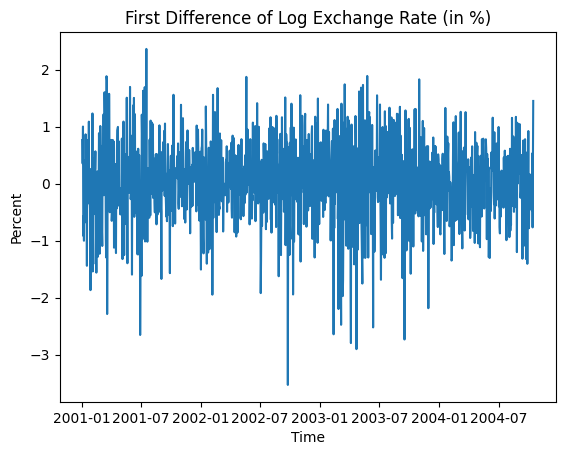

In [6]:
# Compute first difference of log exchange rate
usdaud["log_diff"] = 100 * np.log(usdaud["USDAUD"]).diff()

# Plot first difference of log exchange rate
plt.plot(usdaud["log_diff"])
plt.title("First Difference of Log Exchange Rate (in %)")
plt.xlabel("Time")
plt.ylabel("Percent")
plt.show()

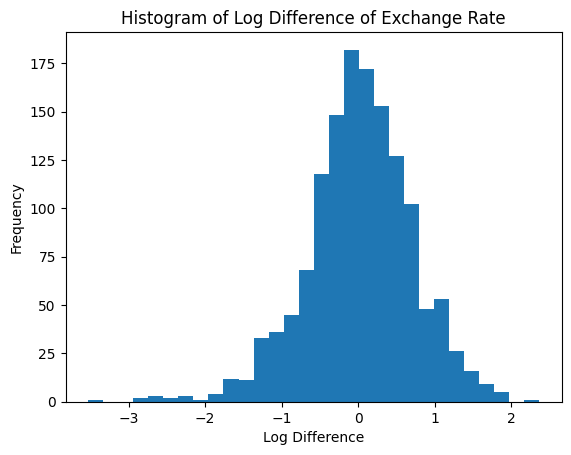

Mean: 0.0205
Standard Deviation: 0.6997
Skewness: -0.4365
Kurtosis: 1.3804
Jarque-Bera test statistic is:  151.93178356846533
Jarque-Bera test p-value is:  1.019606006533313e-33


In [7]:
plt.hist(usdaud["log_diff"], bins=30)
plt.title("Histogram of Log Difference of Exchange Rate")
plt.xlabel("Log Difference")
plt.ylabel("Frequency")
plt.show()

# Compute descriptive statistics
mean = np.mean(usdaud["log_diff"])
std_dev = np.std(usdaud["log_diff"])
skewness = usdaud["log_diff"].skew()
kurtosis = usdaud["log_diff"].kurtosis()

print("Mean: {:.4f}".format(mean))
print("Standard Deviation: {:.4f}".format(std_dev))
print("Skewness: {:.4f}".format(skewness))
print("Kurtosis: {:.4f}".format(kurtosis))

print('Jarque-Bera test statistic is: ', stats.jarque_bera(usdaud["log_diff"].dropna())[0])
print('Jarque-Bera test p-value is: ', stats.jarque_bera(usdaud["log_diff"].dropna())[1])

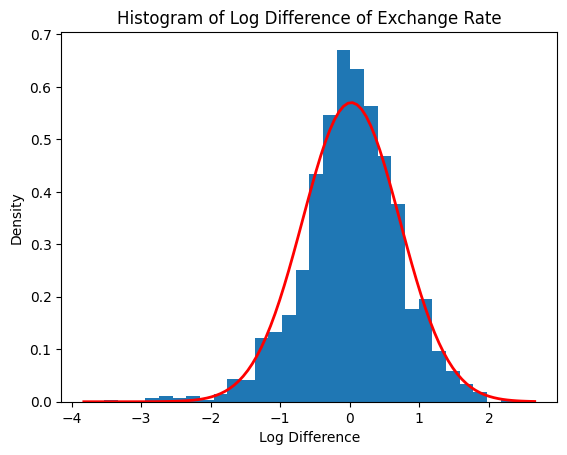

In [8]:
# Plot histogram and normal distribution for comparison
plt.hist(usdaud["log_diff"], bins=30, density=True)
plt.title("Histogram of Log Difference of Exchange Rate")
plt.xlabel("Log Difference")
plt.ylabel("Density")

# Plot normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
plt.plot(x, y, 'r', linewidth=2)

plt.show()

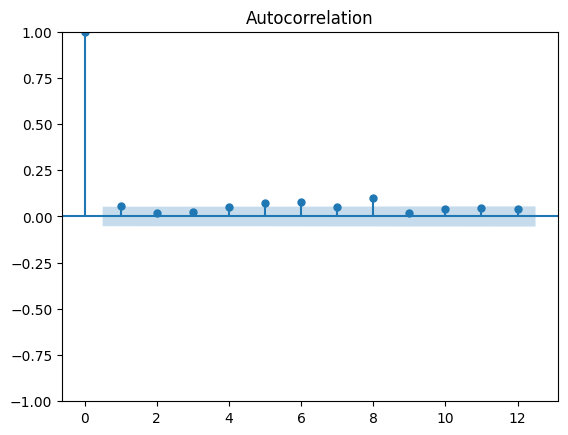

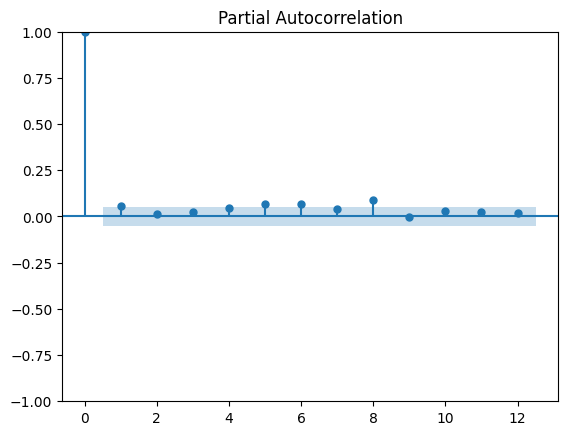

In [9]:
usdaud['log_diff_sq'] = usdaud['log_diff']**2

usdaud.head()
plot_acf(usdaud["log_diff_sq"].dropna(), lags=12)
plot_pacf(usdaud["log_diff_sq"].dropna(), lags=12)
plt.show()

In [10]:
results_ar = ARIMA(usdaud["log_diff_sq"], order=(1, 0, 0)).fit()

# Print summary of results
print(results_ar.summary())
print("AR(1) SIC: {:.4f}".format(results_ar.bic))

                               SARIMAX Results                                
Dep. Variable:            log_diff_sq   No. Observations:                 1382
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1799.980
Date:                Thu, 29 Jun 2023   AIC                           3605.960
Time:                        15:00:43   BIC                           3621.653
Sample:                    01-02-2001   HQIC                          3611.830
                         - 10-14-2004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4900      0.040     12.144      0.000       0.411       0.569
ar.L1          0.0592      0.020      3.012      0.003       0.021       0.098
sigma2         0.7936      0.010     78.557      0.0

In [11]:
# arch
results_arch = arch_model(usdaud["log_diff"].dropna(), vol="GARCH", p=1, q=0, dist='Normal').fit()

print(results_arch.summary())
print("ARCH(1) SIC: {:.4f}".format(results_arch.bic))

Iteration:      1,   Func. Count:      5,   Neg. LLF: 9893.206108750448
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2773.1207304111745
Iteration:      3,   Func. Count:     22,   Neg. LLF: 1466.8095986056564
Iteration:      4,   Func. Count:     26,   Neg. LLF: 3097.9290775324007
Iteration:      5,   Func. Count:     32,   Neg. LLF: 1471.614353489413
Iteration:      6,   Func. Count:     37,   Neg. LLF: 1462.8254906039183
Iteration:      7,   Func. Count:     41,   Neg. LLF: 1462.8172947405246
Iteration:      8,   Func. Count:     45,   Neg. LLF: 1462.8169311062393
Iteration:      9,   Func. Count:     49,   Neg. LLF: 1462.8168780594624
Iteration:     10,   Func. Count:     52,   Neg. LLF: 1462.8168780594128
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1462.8168780594624
            Iterations: 10
            Function evaluations: 52
            Gradient evaluations: 10
                      Constant Mean - ARCH Model Results      

In [12]:
#garch
results_garch = arch_model(usdaud["log_diff"].dropna(), vol="GARCH", p=1, q=1, dist='Normal').fit()

print(results_garch.summary())
print("GARCH(1,1) SIC: {:.4f}".format(results_garch.bic))

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7023.443868092578
Iteration:      2,   Func. Count:     15,   Neg. LLF: 666528380739.3743
Iteration:      3,   Func. Count:     24,   Neg. LLF: 17112.769021527405
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1448.2341973921484
Iteration:      5,   Func. Count:     36,   Neg. LLF: 1486.8584346612029
Iteration:      6,   Func. Count:     43,   Neg. LLF: 1480.6525080531103
Iteration:      7,   Func. Count:     49,   Neg. LLF: 1439.515959169944
Iteration:      8,   Func. Count:     55,   Neg. LLF: 1431.329949569913
Iteration:      9,   Func. Count:     61,   Neg. LLF: 1431.052364252938
Iteration:     10,   Func. Count:     67,   Neg. LLF: 1431.0374470090042
Iteration:     11,   Func. Count:     72,   Neg. LLF: 1431.0372655310853
Iteration:     12,   Func. Count:     76,   Neg. LLF: 1431.0372655355707
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1431.0372655310853
            Iteratio

In [13]:
# Estimate ARCH(1) model for log difference
results_ar_arch = arch_model(usdaud["log_diff"].dropna(), mean='AR', lags = 1, vol="GARCH", p=1, q=0, dist='Normal').fit()

print(results_ar_arch.summary())
print("AR(1)-ARCH(1) SIC: {:.4f}".format(results_ar_arch.bic))

Iteration:      1,   Func. Count:      6,   Neg. LLF: 10369.598743736493
Iteration:      2,   Func. Count:     16,   Neg. LLF: 6344.204830646473
Iteration:      3,   Func. Count:     24,   Neg. LLF: 8127.3200646095775
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1467.9667334628166
Iteration:      5,   Func. Count:     37,   Neg. LLF: 3477607.3770223893
Iteration:      6,   Func. Count:     43,   Neg. LLF: 1558.2021706186565
Iteration:      7,   Func. Count:     50,   Neg. LLF: 1461.333253375146
Iteration:      8,   Func. Count:     55,   Neg. LLF: 1461.2591940645539
Iteration:      9,   Func. Count:     60,   Neg. LLF: 1461.257073158763
Iteration:     10,   Func. Count:     65,   Neg. LLF: 1461.256959864495
Iteration:     11,   Func. Count:     70,   Neg. LLF: 1461.2569567959645
Iteration:     12,   Func. Count:     74,   Neg. LLF: 1461.256956796033
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1461.2569567959645
            Iteratio

In [14]:
# Estimate GARCH(1,1) model for log difference
results_ar_garch = arch_model(usdaud["log_diff"].dropna(), mean='AR', lags = 1, vol="GARCH", p=1, q=1, dist='Normal').fit()

print(results_ar_garch.summary())
print("AR(1)-GARCH(1,1) SIC: {:.4f}".format(results_ar_garch.bic))

Iteration:      1,   Func. Count:      7,   Neg. LLF: 6994.961493839681
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1143361986871.468
Iteration:      3,   Func. Count:     27,   Neg. LLF: 6525.856498791047
Iteration:      4,   Func. Count:     35,   Neg. LLF: 17019.142972744434
Iteration:      5,   Func. Count:     42,   Neg. LLF: 1436.3333106236994
Iteration:      6,   Func. Count:     49,   Neg. LLF: 1525.3629794845244
Iteration:      7,   Func. Count:     57,   Neg. LLF: 1489.0073426113763
Iteration:      8,   Func. Count:     64,   Neg. LLF: 1433.7565178599557
Iteration:      9,   Func. Count:     71,   Neg. LLF: 1430.097218308149
Iteration:     10,   Func. Count:     78,   Neg. LLF: 1429.4956014656098
Iteration:     11,   Func. Count:     84,   Neg. LLF: 1429.492766207869
Iteration:     12,   Func. Count:     90,   Neg. LLF: 1429.492743808676
Iteration:     13,   Func. Count:     97,   Neg. LLF: 1429.4926961500119
Iteration:     14,   Func. Count:    102,   Neg. LLF: 142

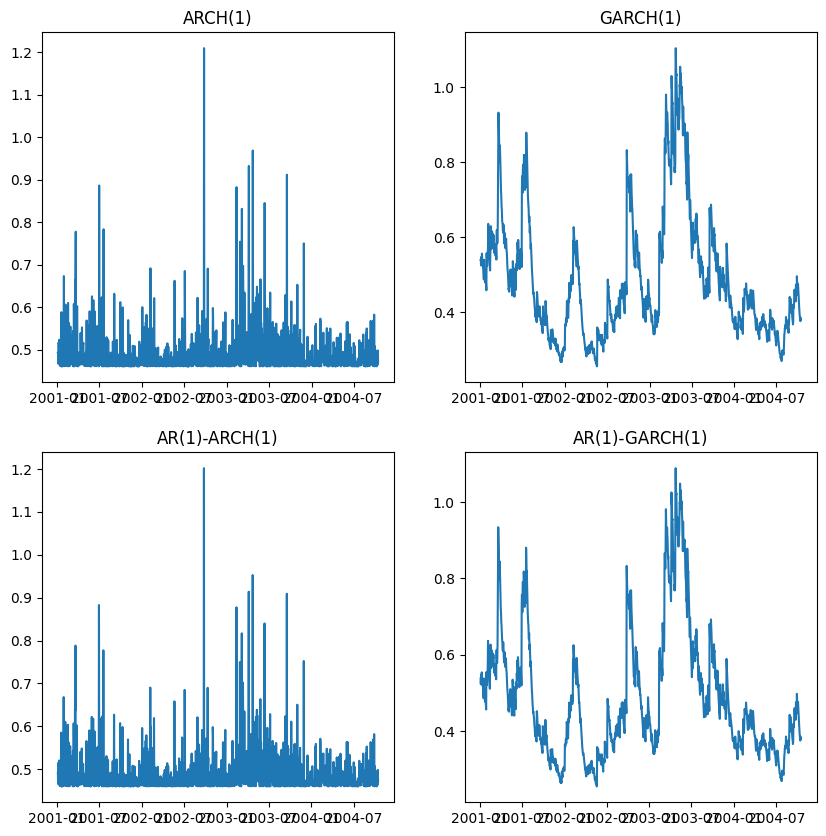

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].plot(results_arch.conditional_volatility**2)
axs[0, 0].set_title("ARCH(1)")

axs[0, 1].plot(results_garch.conditional_volatility**2)
axs[0, 1].set_title("GARCH(1)")

axs[1, 0].plot(results_ar_arch.conditional_volatility**2)
axs[1, 0].set_title("AR(1)-ARCH(1)")

axs[1, 1].plot(results_ar_garch.conditional_volatility**2)
axs[1, 1].set_title("AR(1)-GARCH(1)")

plt.show()

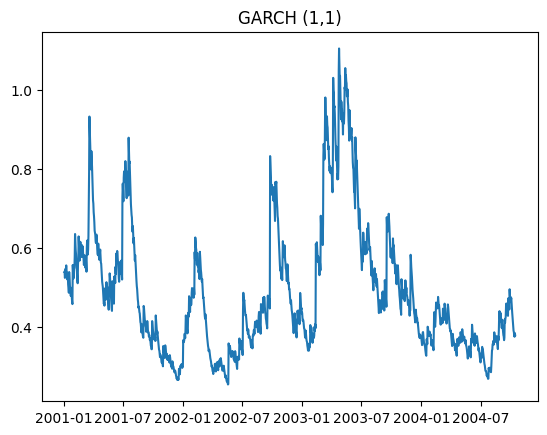

In [16]:
plt.plot(results_garch.conditional_volatility**2)
plt.title('GARCH (1,1)')
plt.show()